# MSDS 430 Milestone 1

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this first milestone we will begin working toward the final project for this course. You should begin by finding a data set that contains data you find interesting. You can find some inspiration and data sets on Kaggle.com or through the university library. Keep in mind that you cannot duplicate what's been done on Kaggle (or anywhere else) for your own project, but you can choose your data set from there or at least get ideas. You will need to also import numpy, matplotlib, and pandas at the very least for this assignment. Feel free to import any other libraries you find necessary.  </font>

Step 1 (5 pts.): Explain your plans for the final project.

**PROJECT NAME: GRADUATE ADMISSIONS EDA**
    
**Project problem statement:** The percentage chance of admission to graduate school should be determinable before
the effort and expenses associated with the application process are incurred.

To help solve the problem, I would like to perform an exploratory data analysis (EDA) based on a graduate admissions
dataset from Kaggle. An EDA has no hard and fast rules, but seeks to investigate data to discover patterns, spot anamomolies,
and test assumptions using summary statistics and visualizations. While the graduate admissions EDA project does not attempt
to make actual predictions, it will be successful if it leads to additional data-supported hypotheses for further analysis
and - in a phase beyond the scope of this course - the development of a predictive model.

Step 2 (5 pts.): Read in your data file and use pandas to inspect the first 5 lines and the last 5 lines.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

dataset = pd.read_csv('Admission_Predict.csv') 

In [2]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


Step 3 (5 pts.): Use numpy to perform a few calculations relevant to your goals for the final project. Explain each calculation by including comments within your code.

In [4]:
'''
The following cells contain code for (OLS) linear regression, where y = mx + b. For the final project, I hope to find a
more efficient approach.

Variables and calculations reference:
Black, K. (2017). Business statistics: For contemporary decision making. Hoboken NJ: John Wiley & Sons. 
'''

# Convert dataframe to array
data = dataset.values

In [5]:
# Function to calculate OLS coefficients:

def ols_coefficients(x, y):
    
    n = np.size(x)
    
    xsum = np.sum(x)
    ysum = np.sum(y)
    x2sum = np.sum(x*x)
    xysum = np.sum(x*y)
    
    ssxy = xysum-((xsum*ysum)/n)
    ssxx = x2sum-(xsum**2/n)
    
    # slope
    b1 = ssxy/ssxx
    
    # y-intercept
    b0 = (ysum/n)-b1*(xsum/n)

    return(b1,b0)

In [6]:
# Function to plot dataset point and the OLS-regression line:

def plot_regression_line(x, y, b):
    
    # plotting dataset points on graph
    figure(figsize=(10,8))
    plt.scatter(x, y, color="r", marker=".", s=50)

    # predicted response vector
    y_pred = b[0]*x + b[1]
    
    # plotting regression line
    plt.plot(x, y_pred, color="k", linestyle=":")
   
    # putting labels for x and y axis
    plt.xlabel('GRE Score')
    plt.ylabel('Chance of Admit')

    # function to show plotted graph
    plt.show()

In [7]:
# Main (master) function to call the previous two functions and pass the x,y, and z paramenters when executed:

def main():
    x = data[:,1]     # GRE Score data
    y = data[:,8]     # Chance of Admit data
    
    # estimating coefficients
    b = ols_coefficients(x, y)
    print(f"OLS coefficients:\nslope m = {b[0]:.5f} \ny-intercept b - {b[1]:.5f}")
    
    # plotting regression line
    plot_regression_line(x, y, b)

Step 4 (5 pts.): Use matplotlib to create a visual display relevant to your goals for the final project. Explain your graph by including comments within your code.

OLS coefficients:
slope m = 0.00998 
y-intercept b - -2.43608


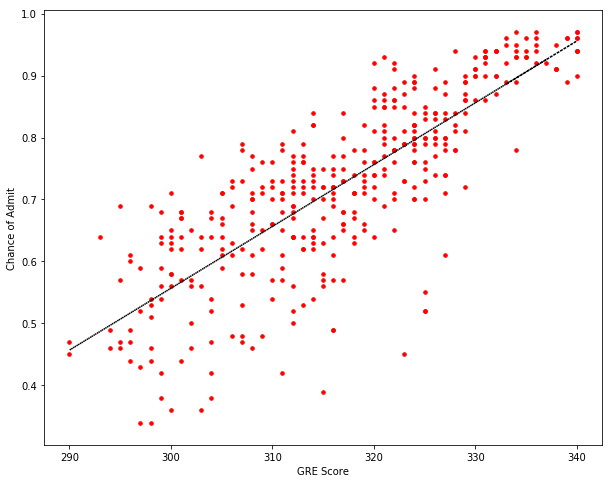

In [8]:
'''
This code executes the main function and provides a scatterplot and (OLS) linear regression line of two
variables from the dataset, namely GRE Score and Chance of Admit. Visually, the spread of the data (as
indicated by the red dots) and the regression line indicate a fairly strong positive relationship.
'''

if __name__ == "__main__":
    main()

In [9]:
'''
How can we be sure the relationship is strongly positive? The correlation coefficient, the strength
of the relationship between the relative movements of two variables, confirms what can be seen visually
above. The calculated value is over 0.80 - quantatatively indicating very strong positive relationship
between GRE scores and chance of admission.
'''

x = data[:,1]     # GRE Score data
y = data[:,8]     # Chance of Admit data
np.corrcoef(x,y)

array([[1.        , 0.80261046],
       [0.80261046, 1.        ]])